<a href="https://colab.research.google.com/github/SuparnoB/Boston_Housing_Analysis/blob/main/SuparnoBhatta_BostonHousing_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import math
from scipy.stats import ttest_ind
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import f_regression
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
df=pd.read_csv(r'C:\Users\SUPARNO BHATTA\Desktop\BostonHousing.csv')

In [ ]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [ ]:
print(df.corr(method='pearson'))

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 

In [ ]:
independent_variables = df.drop('MEDV',axis=1)
x = independent_variables.values
y = df['MEDV'].values

In [ ]:
lr = LinearRegression(fit_intercept = True)
lr.fit(x,y)
y_pred = lr.predict(x)

In [ ]:
print('Coefficients = ',lr.coef_)
print('Intercept = ', lr.intercept_)
print('R^2 = ',lr.score(x,y))
print('Root MSE = ', math.sqrt(metrics.mean_squared_error(y_pred,y)))

Coefficients =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept =  36.4594883850897
R^2 =  0.7406426641094094
Root MSE =  4.679191295697282


In [ ]:
#R^2 value almost reached 1 and RMSE value is not large. We can conclude that this model is the best fit.

In [ ]:
x = independent_variables
y = df['MEDV']
x2 = sm.add_constant(x)
ols = sm.OLS(y,x2)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 06 Jun 2019   Prob (F-statistic):          6.72e-135
Time:                        22:07:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

C:\Users\SUPARNO BHATTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


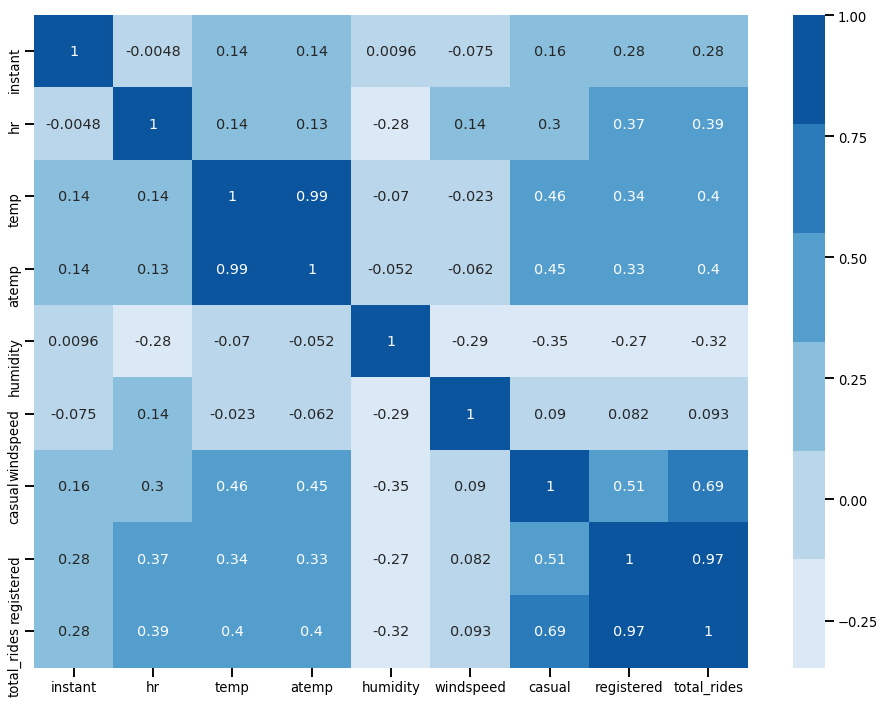

In [ ]:
plt.subplots(figsize=(16, 12))
sns.heatmap(df.corr(),annot=True, cmap=sns.color_palette("Blues"));

IndexError: index 14 is out of bounds for axis 0 with size 14

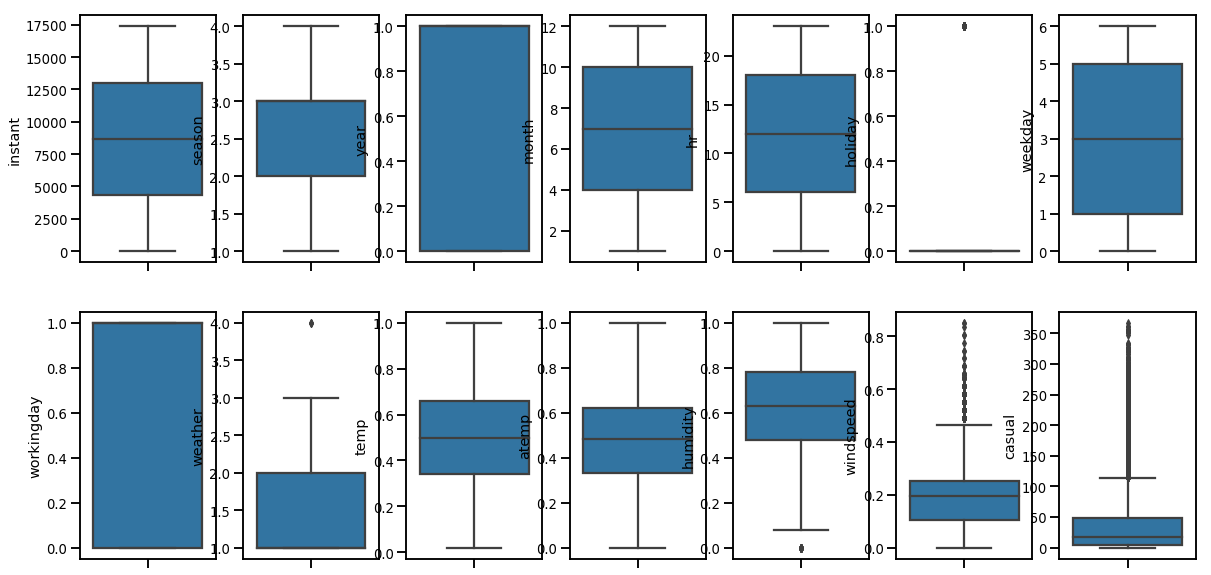

In [ ]:
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.boxplot(y=k, data=df, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
#Regression Equation: MEDV = 36.8920 - 0.1131*CRIM + 0.0471*ZN + 0.0403*INDUS - 17.3670*NOX + 3.8505*RM + 0.0028*AGE - 1.4854*DIS + 0.3283*RAD - 0.0138*TAX - 0.9910*PTRATIO + 0.0097*B - 0.5342*LSTAT
#INTERPRETATION:
#Lower crime rates and higher proportion of residential lands suggests lower median value of owner-occupied homes in $1000's.
#1 unit decrease in crime rates increases median value by 0.1131 unit, all other things being equal.
#1 unit increase in proportion of residential land zoned for lots increases median value by 0.0471 units, all other things being equal. 
#R^2 and adjusted R^2 are extrememly similar.
#RMSE = 4.72

In [ ]:
df = pd.read_csv(r'C:\Users\SUPARNO BHATTA\Desktop\bike-sharing-hour.csv')
df = df.drop('dteday',axis=1)
print(df)
print(df.corr(method='pearson'))

       instant  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1       1   0     1   0        0        6           0   
1            2       1   0     1   1        0        6           0   
2            3       1   0     1   2        0        6           0   
3            4       1   0     1   3        0        6           0   
4            5       1   0     1   4        0        6           0   
5            6       1   0     1   5        0        6           0   
6            7       1   0     1   6        0        6           0   
7            8       1   0     1   7        0        6           0   
8            9       1   0     1   8        0        6           0   
9           10       1   0     1   9        0        6           0   
10          11       1   0     1  10        0        6           0   
11          12       1   0     1  11        0        6           0   
12          13       1   0     1  12        0        6           0   
13          14      

             instant    season        yr      mnth        hr   holiday  \
instant     1.000000  0.404046  0.866014  0.489164 -0.004775  0.014723   
season      0.404046  1.000000 -0.010742  0.830386 -0.006117 -0.009585   
yr          0.866014 -0.010742  1.000000 -0.010473 -0.003867  0.006692   
mnth        0.489164  0.830386 -0.010473  1.000000 -0.005772  0.018430   
hr         -0.004775 -0.006117 -0.003867 -0.005772  1.000000  0.000479   
holiday     0.014723 -0.009585  0.006692  0.018430  0.000479  1.000000   
weekday     0.001357 -0.002335 -0.004485  0.010400 -0.003498 -0.102088   
workingday -0.003416  0.013743 -0.002196 -0.003477  0.002285 -0.252471   
weathersit -0.014198 -0.014524 -0.019157  0.005400 -0.020203 -0.017036   
temp        0.136178  0.312025  0.040913  0.201691  0.137603 -0.027340   
atemp       0.137615  0.319380  0.039222  0.208096  0.133750 -0.030973   
hum         0.009577  0.150625 -0.083546  0.164411 -0.276498 -0.010588   
windspeed  -0.074505 -0.149773 -0.0087

In [ ]:
print('Coefficients = ',lr.coef_)
print('Intercept = ', lr.intercept_)
print('R^2 = ',lr.score(x,y))
print('Root MSE = ', math.sqrt(metrics.mean_squared_error(y_pred,y)))

Coefficients =  [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept =  36.4594883850897
R^2 =  0.7406426641094094
Root MSE =  4.679191295697282


In [ ]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
instant       17379 non-null int64
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12)
memory usage: 2.1 MB


In [ ]:
independent_var = df.drop('cnt',axis=1)

x = independent_var.values
y = df['cnt'].values
print(df)

       instant  season  yr  mnth  hr  holiday  weekday  workingday  \
0            1       1   0     1   0        0        6           0   
1            2       1   0     1   1        0        6           0   
2            3       1   0     1   2        0        6           0   
3            4       1   0     1   3        0        6           0   
4            5       1   0     1   4        0        6           0   
5            6       1   0     1   5        0        6           0   
6            7       1   0     1   6        0        6           0   
7            8       1   0     1   7        0        6           0   
8            9       1   0     1   8        0        6           0   
9           10       1   0     1   9        0        6           0   
10          11       1   0     1  10        0        6           0   
11          12       1   0     1  11        0        6           0   
12          13       1   0     1  12        0        6           0   
13          14      

In [ ]:
lr = LinearRegression(fit_intercept = True)
lr.fit(x,y)
y_pred = lr.predict(x)

In [ ]:
x = independent_var
y = df['cnt']

x2 = sm.add_constant(x)
ols = sm.OLS(y,x2)
est = ols.fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.965e+32
Date:                Thu, 06 Jun 2019   Prob (F-statistic):               0.00
Time:                        22:07:33   Log-Likelihood:             4.7785e+05
No. Observations:               17379   AIC:                        -9.557e+05
Df Residuals:                   17363   BIC:                        -9.555e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.948e-14   1.47e-14      6.777      0.0

C:\Users\SUPARNO BHATTA\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [ ]:
print('Winter vs Spring')
print(ttest_ind(df.total_rides[df['season'] == 1], df.total_rides[df['season'] == 2]))
print('Winter vs Summer')
print(ttest_ind(df.total_rides[df['season'] == 1], df.total_rides[df['season'] == 3]))
print('Winter vs Fall')
print(ttest_ind(df.total_rides[df['season'] == 1], df.total_rides[df['season'] == 4]))
print('Spring vs Fall')
print(ttest_ind(df.total_rides[df['season'] == 2], df.total_rides[df['season'] == 4]))
print('Spring vs Summer')
print(ttest_ind(df.total_rides[df['season'] == 2], df.total_rides[df['season'] == 3]))
print('Summer vs Fall')
print(ttest_ind(df.total_rides[df['season'] == 3], df.total_rides[df['season'] == 4]))

Winter vs Spring


NameError: name 'ttest_ind' is not defined

In [ ]:
#rename columns
df = df.rename(columns={'dteday':'datetime',
                        'yr':'year',
                        'mnth':'month',
                        'weathersit':'weather',
                        'hum':'humidity',
                        'cnt':'total_rides'})
#set categorical variables
##why set as categories??
df['season'] = df['season'].astype('category')
df['year'] = df['year'].astype('category')
df['month'] = df['month'].astype('category')
df['holiday'] = df['holiday'].astype('category')
df['weekday'] = df['weekday'].astype('category')
df['workingday'] = df['workingday'].astype('category')
df['weather'] = df['weather'].astype('category')

In [ ]:
df.head()

,instant,season,year,month,hr,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total_rides
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


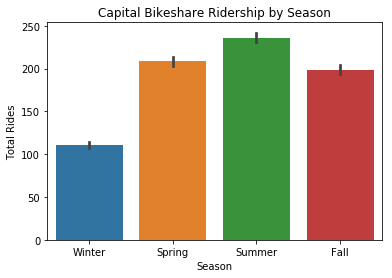

In [ ]:
fig, ax = plt.subplots()
sns.barplot(data=df[['season','total_rides']],
            x='season',
            y='total_rides',
            ax=ax)
plt.title('Capital Bikeshare Ridership by Season')
plt.ylabel('Total Rides')
plt.xlabel('Season')

tick_val=[0, 1, 2, 3]
tick_lab=['Winter', 'Spring', 'Summer', 'Fall']
plt.xticks(tick_val, tick_lab)
plt.show()

<Figure size 4248x1440 with 0 Axes>

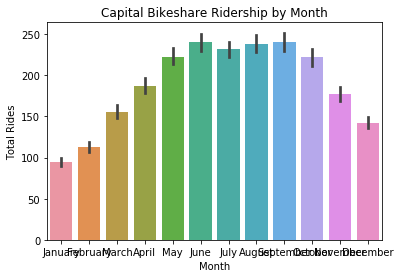

In [ ]:
plt.figure(figsize=(59,20))
fig, ax = plt.subplots()
sns.barplot(data=df[['month','total_rides']], x='month', y='total_rides', ax=ax)

plt.title('Capital Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.show()

In [ ]:
ttest_ind(df['registered'], df['casual'])

Ttest_indResult(statistic=97.81332643791566, pvalue=0.0)

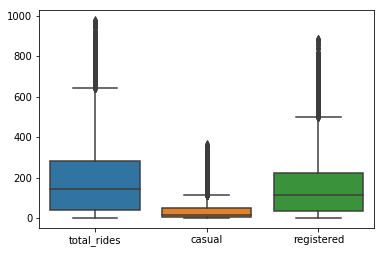

In [ ]:
fig = plt.subplot()
sns.boxplot(data=df[['total_rides', 'casual', 'registered']])

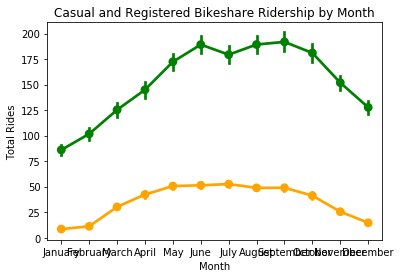

In [ ]:
fig, ax = plt.subplots()
sns.pointplot(data=df[['month', 'casual', 'registered']],
              x='month',
              y='casual',
              ax=ax,
              color='orange')

sns.pointplot(data=df[['month', 'casual', 'registered']],
              x='month',
              y='registered',
              ax=ax,
              color='green')

tick_val=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
tick_lab=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(tick_val, tick_lab)

plt.title('Casual and Registered Bikeshare Ridership by Month')
plt.ylabel('Total Rides')
plt.xlabel('Month')

plt.show()

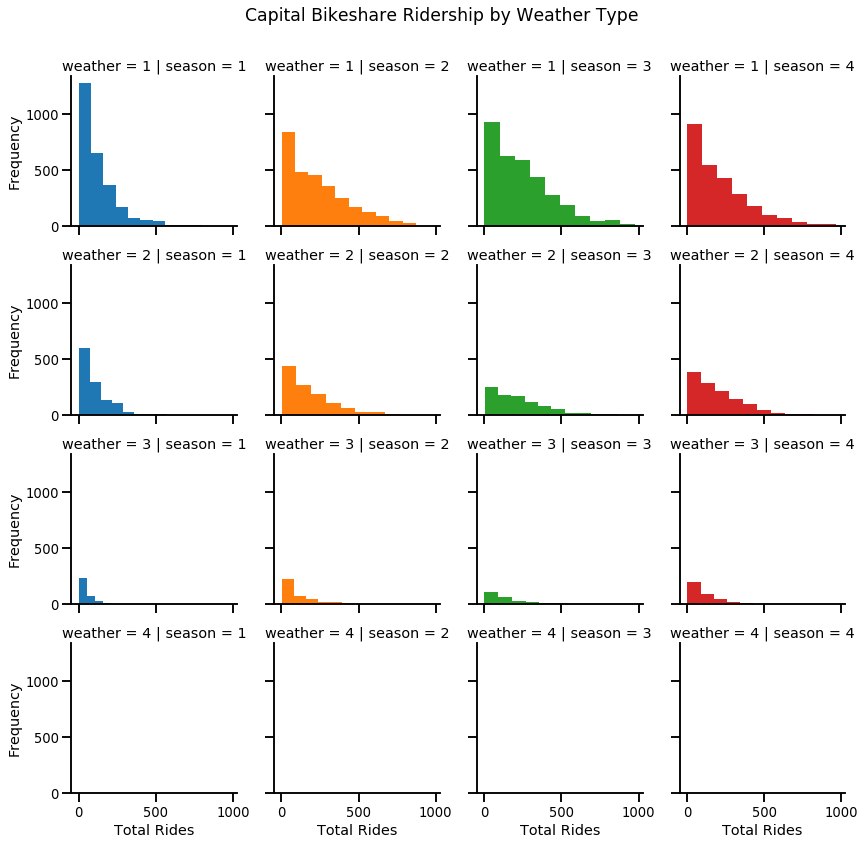

In [ ]:
plt.rcParams['figure.figsize'] = [10.0, 10.0]
sns.set_context('talk', font_scale=0.8)

g = sns.FacetGrid(data=df,
               col='season',
               row='weather',hue='season')
g.map(plt.hist,'total_rides')

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Capital Bikeshare Ridership by Weather Type')

g.set_xlabels('Total Rides')
g.set_ylabels('Frequency')

plt.show()